<a href="https://colab.research.google.com/github/PYthegr8/ML/blob/main/Machine_Learning_Intro_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Introduction


This notebook talks about the basic concepts of machine learning. Describes the steps that you use for training and evaluating a model. It goes over two datasets - the Iris dataset and the
National Poll on Healthy Aging (NPHA) dataset.

Both datasets are available on the UCI repository

[Iris Dataset](https://archive.ics.uci.edu/dataset/53/iris)

[NPHA Dataset](https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha))


Download the CSV files for both datasets and upload them to the folder icon in the Colab notebook. You can also search how to upload files in Colab if you need help.



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Iris.csv')

# Step 1.  Load Dataset and Explore

In this part of the machine learning/deep learning objective, the goal is to understand the nature of the dataset. What are the features of the dataset. What are the types of features, for example, are they continuous values or they categorical values. Plotting these features help us understand the nature and their values

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


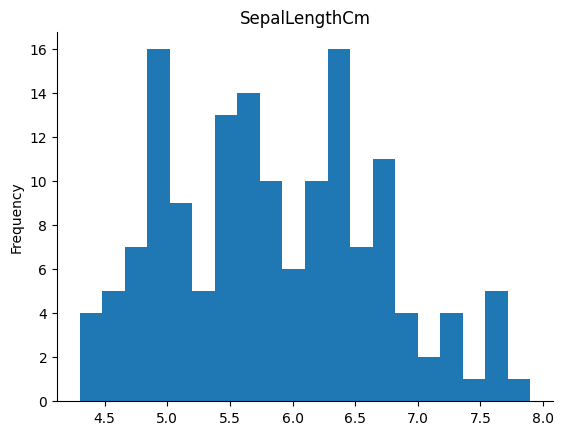

In [ ]:
# @title SepalLengthCm

from matplotlib import pyplot as plt
df['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

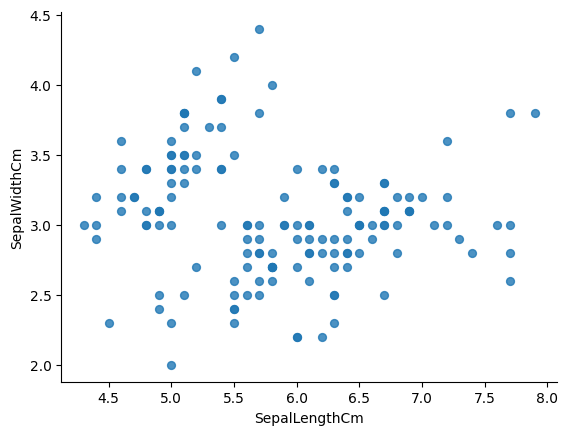

In [ ]:
# @title SepalLengthCm vs SepalWidthCm

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
SepalData = df[["SepalLengthCm", "SepalWidthCm", "Species"]]

SepalData.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [ ]:
some_list = ["red", "flower", "green", "object"]

for i, each_item in enumerate(some_list):
  print(f"{i}. {each_item}")

0. red
1. flower
2. green
3. object


In [ ]:
color_map = []
for i, each_flower in enumerate(SepalData["Species"]):
  if each_flower == "Iris-setosa":
    color_map.append("r")
  elif each_flower == "Iris-versicolor":
    color_map.append("g")
  else:
    color_map.append("b")

print(color_map[45:55])


['r', 'r', 'r', 'r', 'r', 'g', 'g', 'g', 'g', 'g']


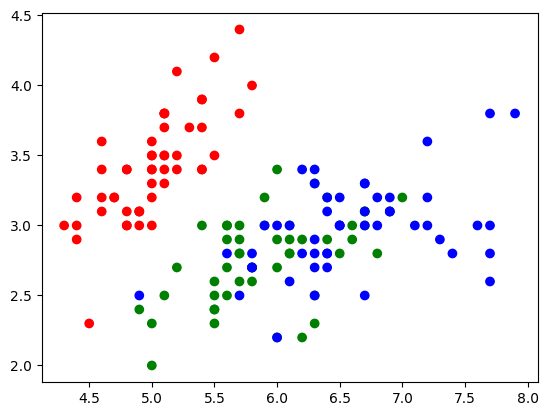

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(SepalData["SepalLengthCm"], SepalData["SepalWidthCm"], c=color_map)

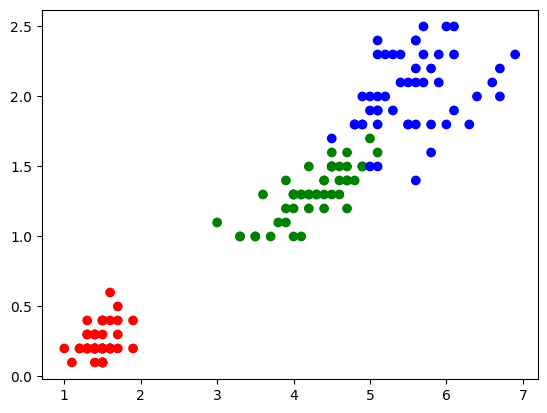

In [ ]:
PetalData = df[["PetalLengthCm", "PetalWidthCm", "Species"]]

plt.scatter(PetalData["PetalLengthCm"], PetalData["PetalWidthCm"], c=color_map)

In [ ]:
PetalData.iloc[75]


PetalLengthCm                4.4
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 75, dtype: object

# Step 2. Pre-process and Split Dataset

In the second step you split the dataset into training and validation sets and you also pre-process dataset. There are several types of pre-processing steps that we take depending upon the data. Some examples that we discussed in class were for images, such as rotating, zooming, flipping and so on

In [ ]:
# For simplicity we are loading the dataset from sci-kit learn
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()

X = iris_data.data
y = iris_data.target

print(f"Shape of input: {X.shape}\nShape of output: {y.shape}")

Shape of input: (150, 4)
Shape of output: (150,)


## Split Dataset

The following function splits the dataset into training and validation sets. It returns 4 np arrays as a tuple

In [ ]:
import random
import numpy as np

def get_train_test_data(data:np.ndarray, target:np.ndarray, test_split=0.2):
  """Return train and test data based on the percentage split

  data: np.ndarray - Data as a np.ndarray with n_sample x n_features dimensions
  target: np.ndarray - Labels for the data with shape n_sample
  test_split: flot - Fraction of data that goes to test data. Default: 0.2
  ----
  Returns: train_data, train_y, test_data, test_y
  """
  # Get `test_split` number of indices

  test_sample_indices = random.sample(list(range(len(data))), int(test_split*len(data)))
  train_data = []
  train_Y = []
  test_data = []
  test_Y = []

  for i, each_row in enumerate(data):
    if i in test_sample_indices:
      test_data.append(data[i])
      test_Y.append(target[i])
    else:
      train_data.append(data[i])
      train_Y.append(target[i])

  return (np.array(train_data),
          np.array(train_Y),
          np.array(test_data),
          np.array(test_Y))


In [ ]:
train_X, train_y, test_X, test_y = get_train_test_data(X, y)

In [ ]:
print(f"There are {len(train_X)}, {len(test_X)} in training and test data respectively")

There are 120, 30 in training and test data respectively


# Step 3. Train the model

This is where the fun begins where you train the model on the dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Load the model. In some cases, it might say that the model could not converge
# (Convergence Warning) which means that the model could not finish training.
# One way to resolve this issue will be to increase the number of iterations
# the model can train over using `max_iter` parameter.

model = LogisticRegression(max_iter=200)
trained_model = model.fit(train_X, train_y) # Train the model by providing it x and y.

# Step 4. Evaluate the model

One of the last steps is to evaluate the model. For classification tasks, you want to look at metrics such as accuracy, F1, and recall. For other tasks you would look at other metrics.

Look at `sklearn.metrics` for the different types of metrics there are and how to use them. Typically you would just provide the prediction values and the ground-truth values to compare

In [ ]:
# One of the simplest tests can be to compare the prediction value and the
# ground truth values. We use the `predict` method from our `LogisticRegression`
# object to get its predictions for the test set. Note that almost all models in
# sklearn have a predict method.

predictions_y = trained_model.predict(test_X)

print(f"Ground Truth: {test_y}")
print(f"Predictions: {predictions_y}")


Ground Truth: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 1 1 1 2 2 2 2 1 2 2 2 1 2 2]


From the above output we see that the prediction does not always match the ground truth. To get a more qualitative and quantitative sense of that, let's look at confusion matrix


# Task

Research what are F1 scores, Recall, and one another metric for accuracy from the sklearn metrics documentation.

What is the formula and how to implement it.

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, recall_score

print(f"Acc: {accuracy_score(test_y, predictions_y)}")
print(f"Recall: {recall_score(test_y, predictions_y, average='micro')}")
print(f"F1: {f1_score(test_y, predictions_y, average='micro')}")



Acc: 0.8666666666666667
Recall: 0.8666666666666667
F1: 0.8666666666666667


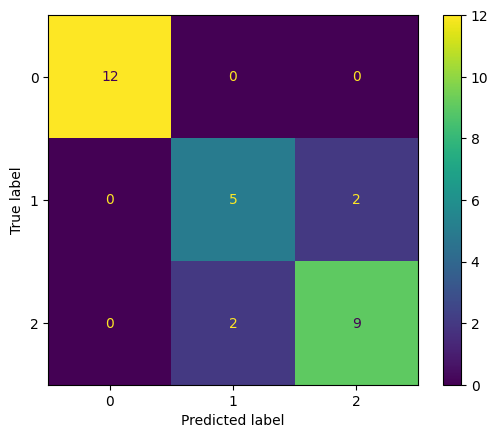

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

matrix = ConfusionMatrixDisplay.from_predictions(test_y, predictions_y)

From the above confusion matrix we see that the model predicts the Seritosa flower very easily, however it has trouble differentiating between VersiColor and Virginica species.


# Task

Experiment with different *classification* models available in the sklearn.linear_model list.

The API would be very similar and you could compare the performance.

As a group exercise you can each implement one model and compare the performance.

# Working with NPHA Dataset

The following section of the notebook goes over the same 4 steps but with the NPHA dataset.

# Step 1. Load and Explore Dataset

In [ ]:
df = pd.read_csv('npha.csv')
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2


<ipython-input-95-afeab7b7c41d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Dental Health', y='Race Label', inner='box', palette='Dark2')


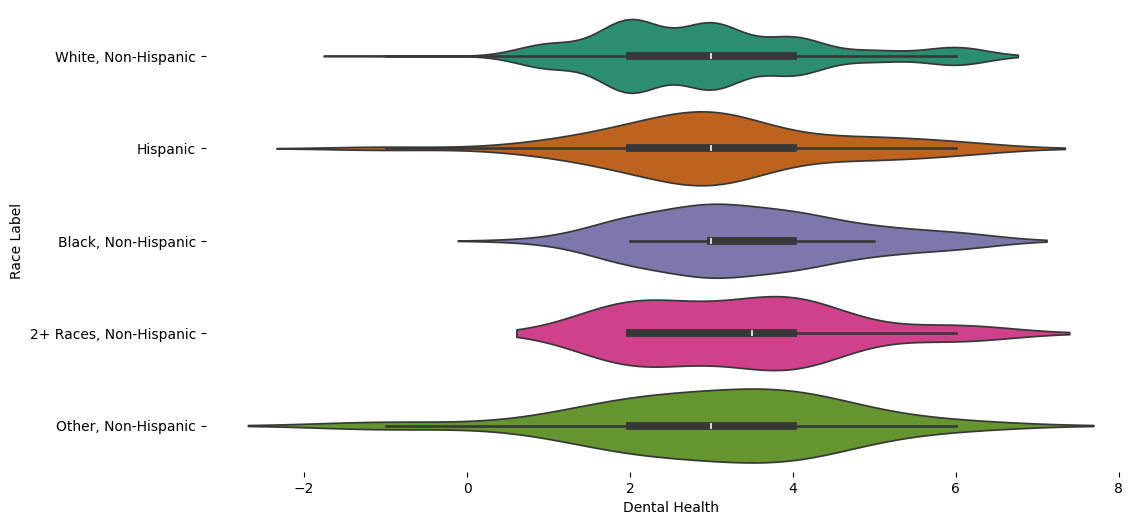

In [ ]:
# @title Race Label vs Dental Health

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Race Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Dental Health', y='Race Label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

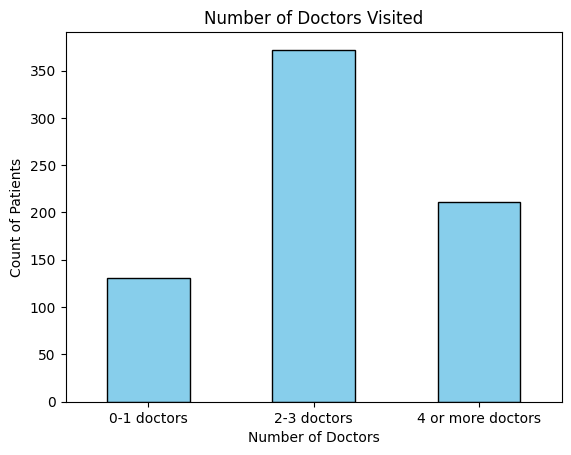

In [ ]:
doctor_counts = df['Number of Doctors Visited'].value_counts()
doctor_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Doctors Visited')
plt.xlabel('Number of Doctors')
plt.ylabel('Count of Patients')
plt.xticks(ticks=[0, 1, 2], labels=['0-1 doctors', '2-3 doctors', '4 or more doctors'], rotation=0)
plt.show()

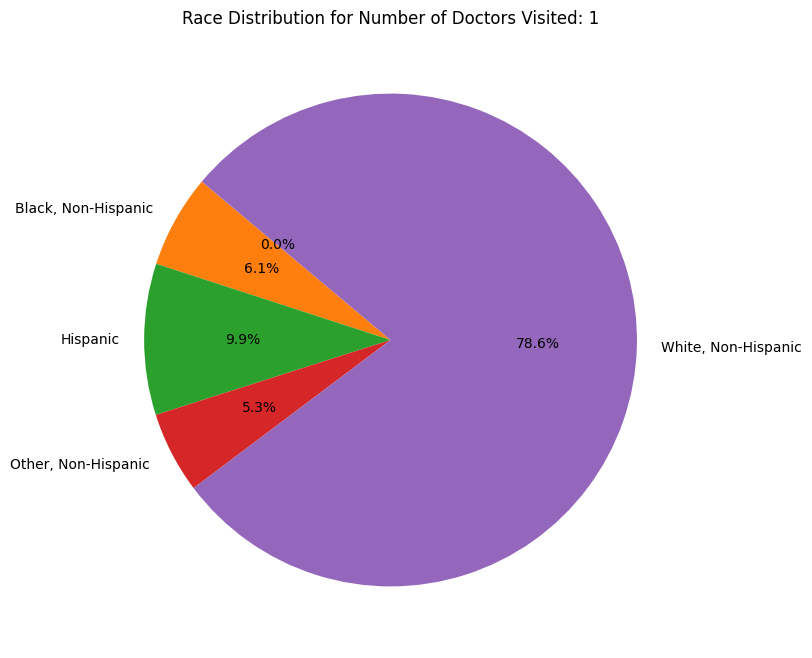

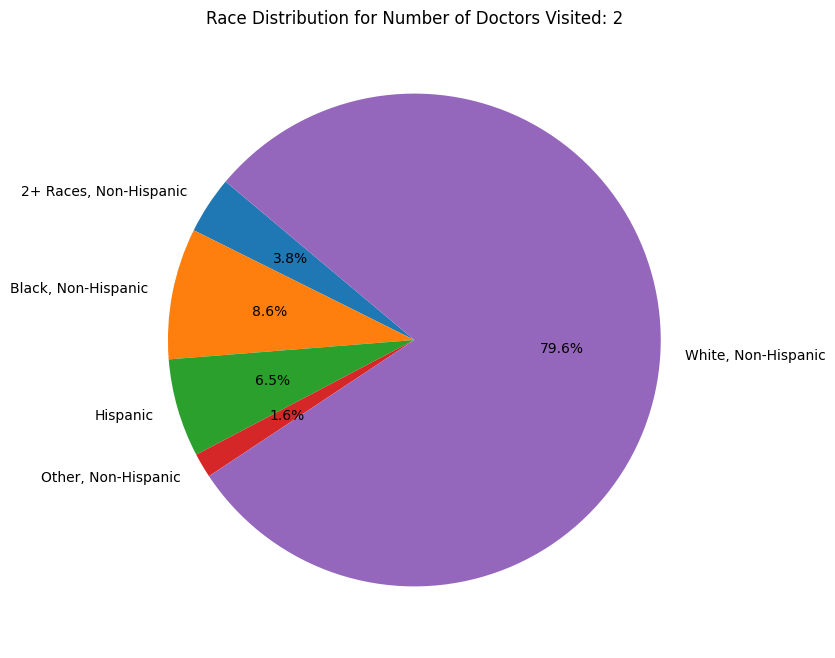

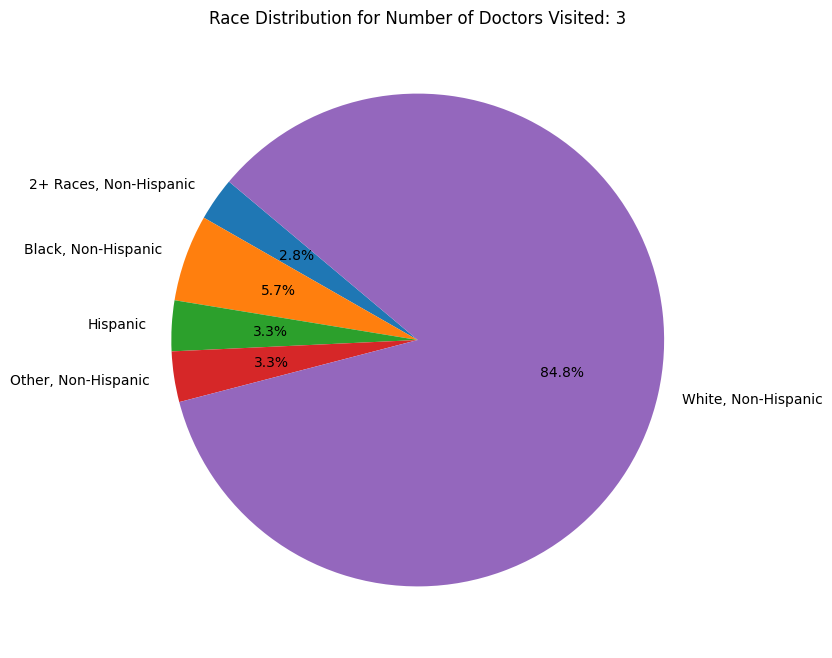

In [ ]:
race_labels = {
    -2: 'Not asked',
    -1: 'Refused',
    1: 'White, Non-Hispanic',
    2: 'Black, Non-Hispanic',
    3: 'Other, Non-Hispanic',
    4: 'Hispanic',
    5: '2+ Races, Non-Hispanic'
}
# Add a column with descriptive race labels
df['Race Label'] = df['Race'].map(race_labels)

grouped_data = df.groupby(['Number of Doctors Visited', 'Race Label']).size().unstack(fill_value=0)


for doctors_visited in grouped_data.index:
    plt.figure(figsize=(8, 8))
    grouped_data.loc[doctors_visited].plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Race Distribution for Number of Doctors Visited: {doctors_visited}')
    plt.ylabel('')  # Hide y-axis label for a cleaner look
    plt.show()

In [ ]:
y = df[df.columns[0]] # The first column is our target column

X = df[list(df.columns)[1:-1]] # Rest of the columns are our features.

X = X.to_numpy() # Change dataframe to numpy array
y = y.to_numpy() # Change dataframe to numpy array

# Step 2. Split and Pre-Process Dataset

In [ ]:
train_X, train_y, test_X, test_y = get_train_test_data(X, y)


In [ ]:
print(f"There are {len(train_X)}, {len(test_X)} in training and test data respectively")

There are 572, 142 in training and test data respectively


# Step 3. Train the model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)

trained_model = model.fit(train_X, train_y)

# Step 4. Evaluate the model

In [ ]:
predictions_y = trained_model.predict(test_X)

print(f"Ground Truth: {test_y[10:20]}")
print(f"Predictions: {predictions_y[10:20]}")


Ground Truth: [2 2 2 1 2 2 1 3 2 1]
Predictions: [2 3 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print(f"Acc: {accuracy_score(test_y, predictions_y):0.2f}")
print(f"Recall: {recall_score(test_y, predictions_y, average='micro'):0.2f}")
print(f"F1: {f1_score(test_y, predictions_y, average='micro'):0.2f}")



Acc: 0.56
Recall: 0.56
F1: 0.56


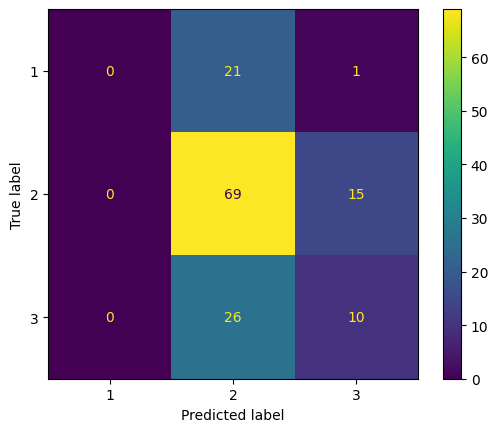

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

matrix = ConfusionMatrixDisplay.from_predictions(test_y, predictions_y)

# Task

See how you can improve the performance of the model.

Instead of using all features try only a few features.

Add this notebook to your GitHub repository